In [126]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0) # set default size of plots

np.random.seed(1)

In [127]:
# Funções
### Sigmoid (Logística)
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1+np.exp(-z))
    
    return s

In [128]:
###  Modelo para Regressão

def layer_sizes2(X, Y, n_h=4):
    """
    Argumentos:
    X -- shape do input (quantidade de features, quantidade de exemplos)
    Y -- shape do target (1, quantidade de exemplos)
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def initialize_parameters2(n_x, n_h, n_y):
    """
    Argument:
    n_x -- tamanho da camada de entrada
    n_h -- tamanho da camada escondida
    n_y -- tamanho da camada de saída
    
    Retorna:
    params -- dicionário com os parâmetros (pesos) iniciais do modelo:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    
    np.random.seed(2) # garantir a reprodução do código
    
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def forward_propagation2(X, parameters):
    """
    Argumentos:
    X -- input de tamanho (n_x, m)
    parametros -- python dicionário contendo os parâmetros (saída da função de inicialização dos parametros)
    
    Retorna:
    A2 -- A saída da função sigmoidal ou tangente hiberbólica ou relu
    cache -- dicionário contendo "Z1", "A1", "Z2" e "A2"
    """

    # Recupere cada parâmetro do dicionário parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implementando a Forward Propagation para calcular A1 tanh e A2 linear
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


def compute_cost2(A2, Y, parameters):
    """
    Computa o custo dado os argumentos
    
    Arguments:
    A2 -- Saída linear da segunda ativação de shape (1, qtd de exemplos)
    Y -- Valor verdadeiro do rótulo de shape (1, qtd de exemplos)
    parameters -- dicionário contendo os parâmetros W1, b1, W2 and b2
    
    Retorna:
    cost
    
    """
    
    m = Y.shape[1] # quantidade de exemplos

    # Computa o custo (cost)
    err = A2 - Y
    cost = 1/m * np.sum(err**2)
    
    cost = float(np.squeeze(cost))  # garanta que o custo tem a dimensão esperada
    assert(isinstance(cost, float))
    
    return cost

def backward_propagation2(parameters, cache, X, Y):
    """
    Implementa a retropropagação 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    cache -- dicionário contendo "Z1", "A1", "Z2" and "A2".
    X -- input de shape (qtd de features, qtd de examplos)
    Y -- valor verdadeiro do rótulo de shape (1, qtd de examplos)
    
    Retorna:
    grads -- dicionário contendo os gradientes em relação aos diferentes parâmetros
    """
    m = X.shape[1]
    
    # Primeiro, recuperamos W1 e W2 do dicinário "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Recuperamos também A1 e A2 do dicionário "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Retropropagação: calcula-se dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters2(parameters, grads, learning_rate = 1.2):
    """
    Atualiza os parâmetros utilizando o gradient descendente 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    grads -- dicionário contendo os gradientes
    
    Retorna:
    parameters -- dicionário contendo os parâmetros atualizados
    """
    # Recupera-se cada parâmetro do dicionário "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Recupera-se cada gradiente do dicionário "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Regra de atualização para cada parâmetro
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def nn_model2(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Argumentos:
    X -- dataset de shape (2, qtd de examplos)
    Y -- labels de shape (1, qtd de examplos)
    n_h -- tamanho da camada escondida
    num_iterations -- quantidade de iterações do gradiente descendente
    print_cost -- se True, mostra o custo a cada 1000 iterações
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem ser utilizados para fazer previsões (predict).
    """
    
    np.random.seed(3)
    n_x = layer_sizes2(X, Y)[0]
    n_y = layer_sizes2(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialize_parameters2(n_x, n_h, n_y)

    # Gradiente descendente (loop)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation2(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost2(A2, Y, parameters)
 
        # Retropropagação (Backpropagation). Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation2(parameters, cache, X, Y)
 
        # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters2(parameters, grads, learning_rate=1.2)
        
        # Print o custo (cost) a cada 1000 iterações
        if print_cost and i % 1000 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))

    return parameters

def predict2(parameters, X):
    """
    Utiliza os parâmetros aprendidos para prever o valor da saída para cada exemplo X 
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    X -- input de tamanho (n_x, m)
    
    Retorna
    predictions -- vetor de valores previstos do modelo treinado
    """
    
    A2, cache = forward_propagation2(X, parameters)
    predictions = A2
    
    return predictions

In [269]:
#### Resilient Backpropagation RProp ####

def rprop_update(parameter, grad_old, grad_new, step_size,learning_rate_max, learning_rate_min):
    
    n_i = parameter.shape[0]
    n_j = parameter.shape[1]

    for i in range(n_i):

        for j in range(n_j):

            if grad_old[i, j] * grad_new[i, j] > 0:
                step_size[i, j] = min(step_size[i,j] * learning_rate_max, step_size.max())
                grad_new[i, j] = - np.sign(grad_new[i, j]) * step_size[i, j]
                parameter[i, j] = parameter[i, j] + grad_new[i, j]
            
            elif grad_old[i, j] * grad_new[i, j] < 0:
                step_size[i, j] = max(step_size[i,j] * learning_rate_min, step_size.min())
                grad_new[i, j] = 0
            
            else: 
                grad_new[i, j] = - np.sign(grad_new[i, j]) * step_size[i, j]
                parameter[i, j] = parameter[i, j] + grad_new[i, j]

    return parameter, grad_new, step_size
    

def update_parameters_rprop2(parameters, grads_old, grads_new, step_size,learning_rate_max = 1.2, learning_rate_min = 0.5):
    """
    Atualiza os parâmetros utilizando o Resilient backpropagation
    
    Argumentos:
    parameters -- dicionário contendo os parâmetros
    grads -- dicionário contendo os gradientes
    
    Retorna:
    parameters -- dicionário contendo os parâmetros atualizados
    """
    # Recupera-se cada parâmetro do dicionário "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Recupera-se cada gradiente do dicionário "grads_old" e "grads_new"
    dW1_old = grads_old['dW1']
    db1_old = grads_old['db1']
    dW2_old = grads_old['dW2']
    db2_old = grads_old['db2']

    dW1_new = grads_new['dW1']
    db1_new = grads_new['db1']
    dW2_new = grads_new['dW2']
    db2_new = grads_new['db2']

    W1_step = step_size['W1']
    b1_step = step_size['b1']
    W2_step = step_size['W2']
    b2_step = step_size['b2']


    W1, dW1_new, W1_step = rprop_update(W1, dW1_old, dW1_new, W1_step, learning_rate_max, learning_rate_min)
    b1, db1_new, b1_step = rprop_update(b1,db1_old, db1_new, b1_step, learning_rate_max, learning_rate_min) 
    W2, dW2_new, W2_step = rprop_update(W2,dW2_old, dW2_new, W2_step, learning_rate_max, learning_rate_min)
    b2, db2_new, b2_step = rprop_update(b2,db2_old, db2_new, b2_step, learning_rate_max, learning_rate_min)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    grads = {"dW1": dW1_new,
             "db1": db1_new,
             "dW2": dW2_new,
             "db2": db2_new}

    step_size = {"W1": W1_step,
                 "b1": b1_step,
                 "W2": W2_step,
                 "b2": b2_step}

    return parameters, grads, step_size

def nn_model_rprop(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Argumentos:
    X -- dataset de shape (2, qtd de examplos)
    Y -- labels de shape (1, qtd de examplos)
    n_h -- tamanho da camada escondida
    num_iterations -- quantidade de iterações do gradiente descendente
    print_cost -- se True, mostra o custo a cada 1000 iterações
    
    Retorna:
    parameters -- parâmetros aprendidos pelo modelo. Eles podem ser utilizados para fazer previsões (predict).
    """
    
    np.random.seed(3)
    n_x = layer_sizes2(X, Y)[0]
    n_y = layer_sizes2(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialize_parameters2(n_x, n_h, n_y)
    
    # Gradiente descendente (loop)
    grads_old = {"dW1": np.zeros((n_h, n_x)),
                 "db1": np.zeros((n_h, 1)),
                 "dW2": np.zeros((n_y, n_h)),
                 "db2": np.zeros((n_y, 1))}

    step_size = {"W1": np.random.rand(n_h, n_x),
                "b1": np.random.rand(n_h, 1),
                "W2": np.random.rand(n_y, n_h),
                "b2": np.random.rand(n_y, 1)}

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation2(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost2(A2, Y, parameters)
 
        # Retropropagação (Backpropagation). Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads_new = backward_propagation2(parameters, cache, X, Y)
 
        # Atualização dos parâmetros pelo gradiente descendente. Inputs: "parameters, grads". Outputs: "parameters".
        parameters, grads_old, step_size = update_parameters_rprop2(parameters, grads_old, grads_new, step_size, learning_rate_max=1.2, learning_rate_min=0.5)

        # Print o custo (cost) a cada 1000 iterações
        if print_cost and i % 1000 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))

    return parameters


In [255]:
X = np.random.rand(2, 10)
Y = np.random.randn(1, 10)


In [256]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size

In [257]:

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

(n_x, n_h, n_y) = layer_sizes2(X,Y)

The shape of X is: (2, 10)
The shape of Y is: (1, 10)
I have m = 10 training examples!


In [258]:
parameters = initialize_parameters2(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [259]:
A2, cache = forward_propagation2(X, parameters)

print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.005954650674829288 -0.005954269272852108 -8.568589375418496e-05 -8.568589375418496e-05


In [260]:
print("cost = " + str(compute_cost2(A2, Y, parameters)))

cost = 1.8830368402571542


In [261]:
grads = backward_propagation2(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-0.00370895 -0.00093768]
 [-0.00318659 -0.0008056 ]
 [ 0.00193293  0.00048861]
 [ 0.00803605  0.00203171]]
db1 = [[-0.00632902]
 [-0.00543764]
 [ 0.00329849]
 [ 0.01371291]]
dW2 = [[-0.00151094 -0.00603516 -0.00703303  0.00065927]]
db2 = [[0.59823671]]


In [208]:
parameters = update_parameters2(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00687229 -0.00057768]
 [-0.02368557  0.01638988]
 [-0.0165248  -0.00840972]
 [ 0.010889   -0.01242034]]
b1 = [[-0.00199385]
 [-0.00171267]
 [ 0.00103892]
 [ 0.00432007]]
W2 = [[-0.01164579 -0.01452792  0.00091788  0.02419006]]
b2 = [[0.1884668]]


In [270]:
grads_old = {"dW1": np.zeros((n_h, n_x)),
                 "db1": np.zeros((n_h, 1)),
                 "dW2": np.zeros((n_y, n_h)),
                 "db2": np.zeros((n_y, 1))}

step_size = {"W1": np.random.rand(n_h, n_x),
                 "b1": np.random.rand(n_h, 1),
                 "W2": np.random.rand(n_y, n_h),
                 "b2": np.random.rand(n_y, 1)}


parameters_rprop = update_parameters_rprop2(parameters, grads_old, grads, step_size,learning_rate_max=1.2, learning_rate_min=0.5)
parameters_rprop

IndexError: index 2 is out of bounds for axis 1 with size 2

In [271]:
parameters = nn_model_rprop(X, Y, n_h = 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Custo após iteração 0: 1.883037
Custo após iteração 1000: 1.494173
Custo após iteração 2000: 1.416127
Custo após iteração 3000: 1.430944
Custo após iteração 4000: 1.429608
Custo após iteração 5000: 1.444651
Custo após iteração 6000: 1.428968
Custo após iteração 7000: 1.442086
Custo após iteração 8000: 1.428527
Custo após iteração 9000: 1.426838
W1 = [[ 0.06937357 -1.62450334]
 [-0.30774512  0.6830912 ]
 [-1.00582664  2.05892161]
 [ 0.04292893  0.08681724]]
b1 = [[ 0.39960028]
 [-0.1573598 ]
 [-0.26229162]
 [-0.16482437]]
W2 = [[-0.13726489  0.00774362  0.41070886  0.10313706]]
b2 = [[-0.22030621]]


In [152]:
parameters = nn_model2(X, Y, n_h = 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Custo após iteração 0: 1.423565
Custo após iteração 1000: nan
Custo após iteração 2000: nan
Custo após iteração 3000: nan
Custo após iteração 4000: nan
Custo após iteração 5000: nan
Custo após iteração 6000: nan
Custo após iteração 7000: nan
Custo após iteração 8000: nan
Custo após iteração 9000: nan
W1 = [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
b1 = [[nan]
 [nan]
 [nan]
 [nan]]
W2 = [[nan nan nan nan]]
b2 = [[nan]]


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas_datareader.data as web
from datetime import datetime

In [212]:
df = web.DataReader('^DJI', 'stooq', start='2019-09-10', end='2019-10-09')
df.reset_index(inplace = True)

In [213]:
df

,Date,Open,High,Low,Close,Volume
0,2020-07-24,26533.41,26625.70,26402.86,26469.89,498367414
1,2020-07-23,26955.97,26973.85,26560.04,26652.33,432001397
2,2020-07-22,26824.56,27035.24,26794.19,27005.84,414798714
3,2020-07-21,26833.14,27025.38,26766.22,26840.40,367856994
4,2020-07-20,26660.29,26765.02,26504.20,26680.87,313720152
...,...,...,...,...,...,...
1252,2015-08-04,17596.93,17635.78,17505.50,17550.69,99064484
1253,2015-08-03,17696.74,17704.76,17496.61,17598.20,87875896
1254,2015-07-31,17755.87,17783.59,17671.59,17689.86,106052869
1255,2015-07-30,17743.24,17761.25,17640.85,17745.98,76641341


In [214]:
df = df.drop(['Date'],axis=1) # Drop Date feature
df = df.dropna(inplace=False)  # Remove all nan entries.

df = df.drop(['Volume'],axis=1) # Drop Adj close and volume feature
df_train = df[:1059]    # 60% training data and 40% testing data
df_test = df[1059:]
scaler = MinMaxScaler() # For normalizing dataset

In [215]:
# We want to predict Close value of stock 
X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1))
y_train = scaler.fit_transform(df_train['Close'].values.reshape(-1,1))

# y is output and x is features.
X_test = scaler.fit_transform(df_test.drop(['Close'],axis=1))
y_test = scaler.fit_transform(df_test['Close'].values.reshape(-1,1))

In [216]:
def denormalize(df,norm_data):
    df = df['Close'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    return new


In [272]:
parameters = nn_model_rprop(X_train.T, y_train.T, n_h=4, print_cost=True)

Custo após iteração 0: 0.337478
Custo após iteração 1000: 0.411719
Custo após iteração 2000: 0.411719
Custo após iteração 3000: 0.411719
Custo após iteração 4000: 0.411719
Custo após iteração 5000: 0.411719
Custo após iteração 6000: 0.411719
Custo após iteração 7000: 0.411719
Custo após iteração 8000: 0.411719
Custo após iteração 9000: 0.411719


In [160]:
parameters = nn_model2(X_train.T, y_train.T, n_h = 4, print_cost = True)

Custo após iteração 0: 0.337478
Custo após iteração 1000: 0.000548
Custo após iteração 2000: 0.000359
Custo após iteração 3000: 0.000323
Custo após iteração 4000: 0.000306
Custo após iteração 5000: 0.000297
Custo após iteração 6000: 0.000289
Custo após iteração 7000: 0.000283
Custo após iteração 8000: 0.000278
Custo após iteração 9000: 0.000272


In [273]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.10257933 -0.02527451  0.07797114]
 [-0.2173111  -0.57370505 -0.22777231]
 [-0.01744546 -0.09704557 -0.09028854]
 [-0.06113008  0.01477315  0.07617103]]
b1 = [[-0.24580447]
 [-0.3819768 ]
 [-0.16959271]
 [ 0.07249916]]
W2 = [[ 4.15393930e-04 -4.94249090e-01  1.06437927e-01  3.03552524e-01]]
b2 = [[0.79363745]]


In [274]:
predictions = predict2(parameters, X_test.T)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 1.1517013204538336


In [275]:
pred = denormalize(df_test, predictions.T)

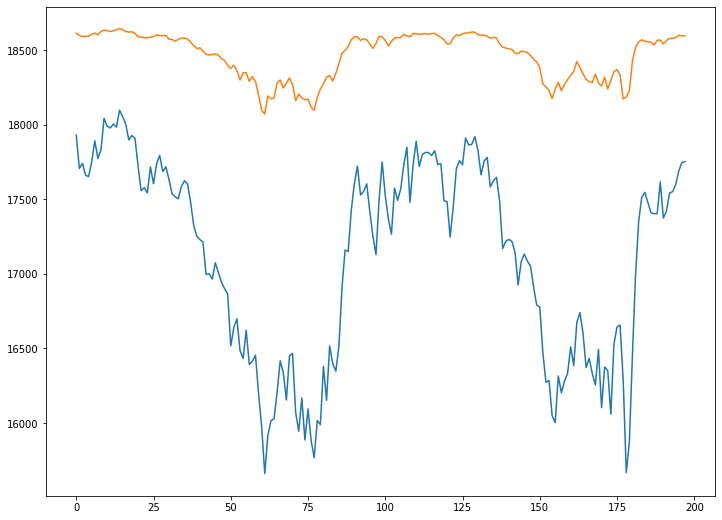

In [276]:
plt.plot(range(y_test.shape[0]),df_test['Close'])
plt.plot(range(y_test.shape[0]),pred)